## Business Case:-Based on given features we need to find whether an employee will leave the company or not.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle
from sklearn.pipeline import Pipeline
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
data = pd.read_csv("churn-bigml-80.csv")

In [4]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


### Basic Checks:

In [5]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
data.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2665,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [8]:
data.shape

(2666, 20)

In [9]:
data.index

RangeIndex(start=0, stop=2666, step=1)

In [10]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [11]:
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [12]:
num_data=data.select_dtypes(include=["float64","int64"])
print("numerical columns",num_data.columns)

numerical columns Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')


In [13]:
# Select categorical columns
cat_data = data.select_dtypes(include=['object', 'bool'])
print("categorical columns", cat_data.columns)

categorical columns Index(['State', 'International plan', 'Voice mail plan', 'Churn'], dtype='object')


In [14]:
# Analyzing categorical features by examining unique values and their frequency distribution to understand customer behavior patterns.
for col in cat_data.drop("Churn", axis=1).columns:
    print(f"Column: {col}")
    print("Unique values:", data[col].unique())
    print("Value counts:")
    print(data[col].value_counts())
    print("**********************")


Column: State
Unique values: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']
Value counts:
State
WV    88
MN    70
NY    68
VA    67
AL    66
OH    66
WY    66
OR    62
NV    61
WI    61
MD    60
UT    60
CO    59
CT    59
MI    58
VT    57
ID    56
NC    56
TX    55
FL    54
IN    54
MT    53
OK    52
MA    52
KS    52
MO    51
DE    51
NJ    50
SC    49
SD    49
ME    49
GA    49
RI    48
MS    48
WA    48
AR    47
IL    45
DC    45
AZ    45
NE    45
HI    44
NM    44
ND    44
AK    43
KY    43
NH    43
TN    41
IA    38
PA    36
LA    35
CA    24
Name: count, dtype: int64
**********************
Column: International plan
Unique values: ['No' 'Yes']
Value counts:
International plan
No     2396
Yes     270
Name: count, dtype: int64
**********************
Column: Voice mail pla

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


In [16]:
data.describe(include='O').T

,count,unique,top,freq
State,2666,51,WV,88
International plan,2666,2,No,2396
Voice mail plan,2666,2,No,1933


In [17]:
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [18]:
data.duplicated().sum()

np.int64(0)

In [19]:
# Check number of unique values in each column
data.nunique()

State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

In [20]:
constant_cols = [col for col in data.columns if data[col].nunique() == 1]

print("Constant Features:", constant_cols)


Constant Features: []


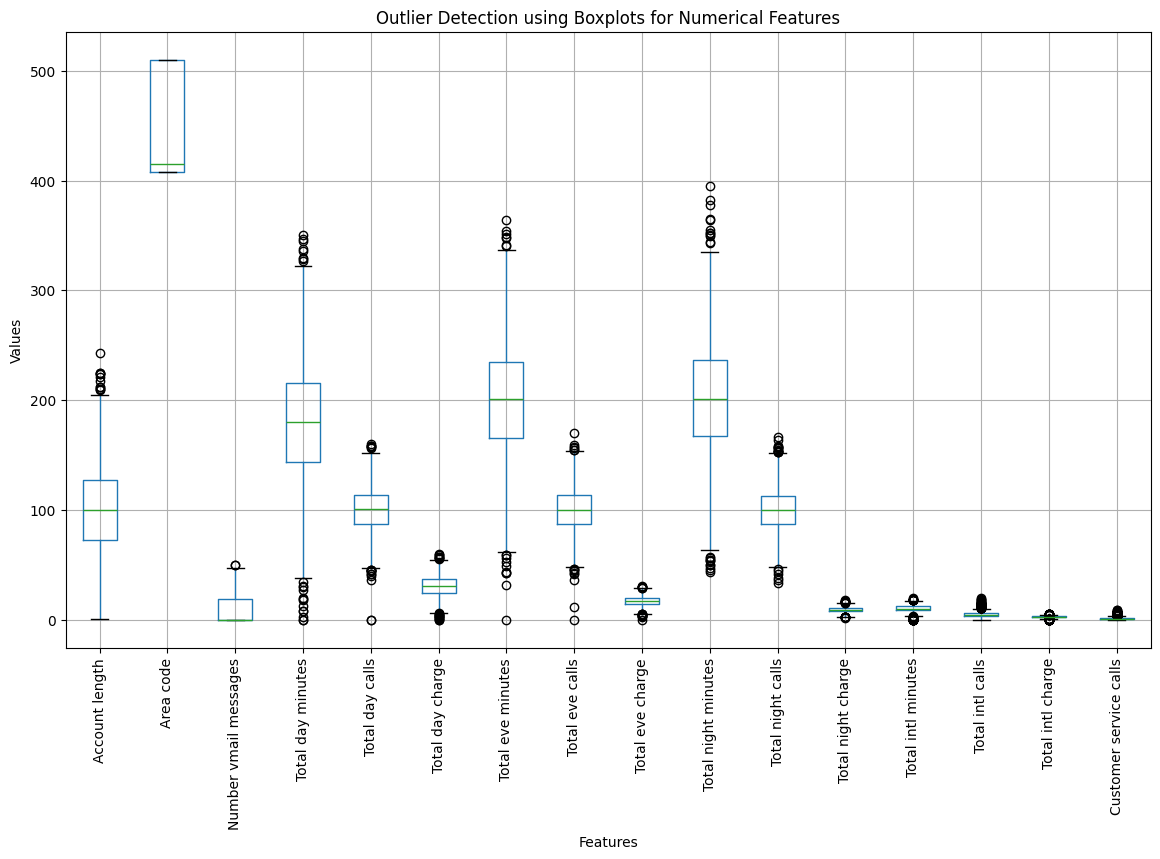

In [22]:
# Step: Select numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical features
plt.figure(figsize=(14, 8))
data[numerical_cols].boxplot()
plt.xticks(rotation=90)
plt.title('Outlier Detection using Boxplots for Numerical Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.savefig("Outlier Detection using Boxplots for Numerical Features.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
pip install ydata-profiling

In [ ]:
profile=ProfileReport(data,title="EDA",explorative=True)

In [ ]:
profile

In [ ]:
profile.to_file("Customer_Churn_EDA_Report.html")

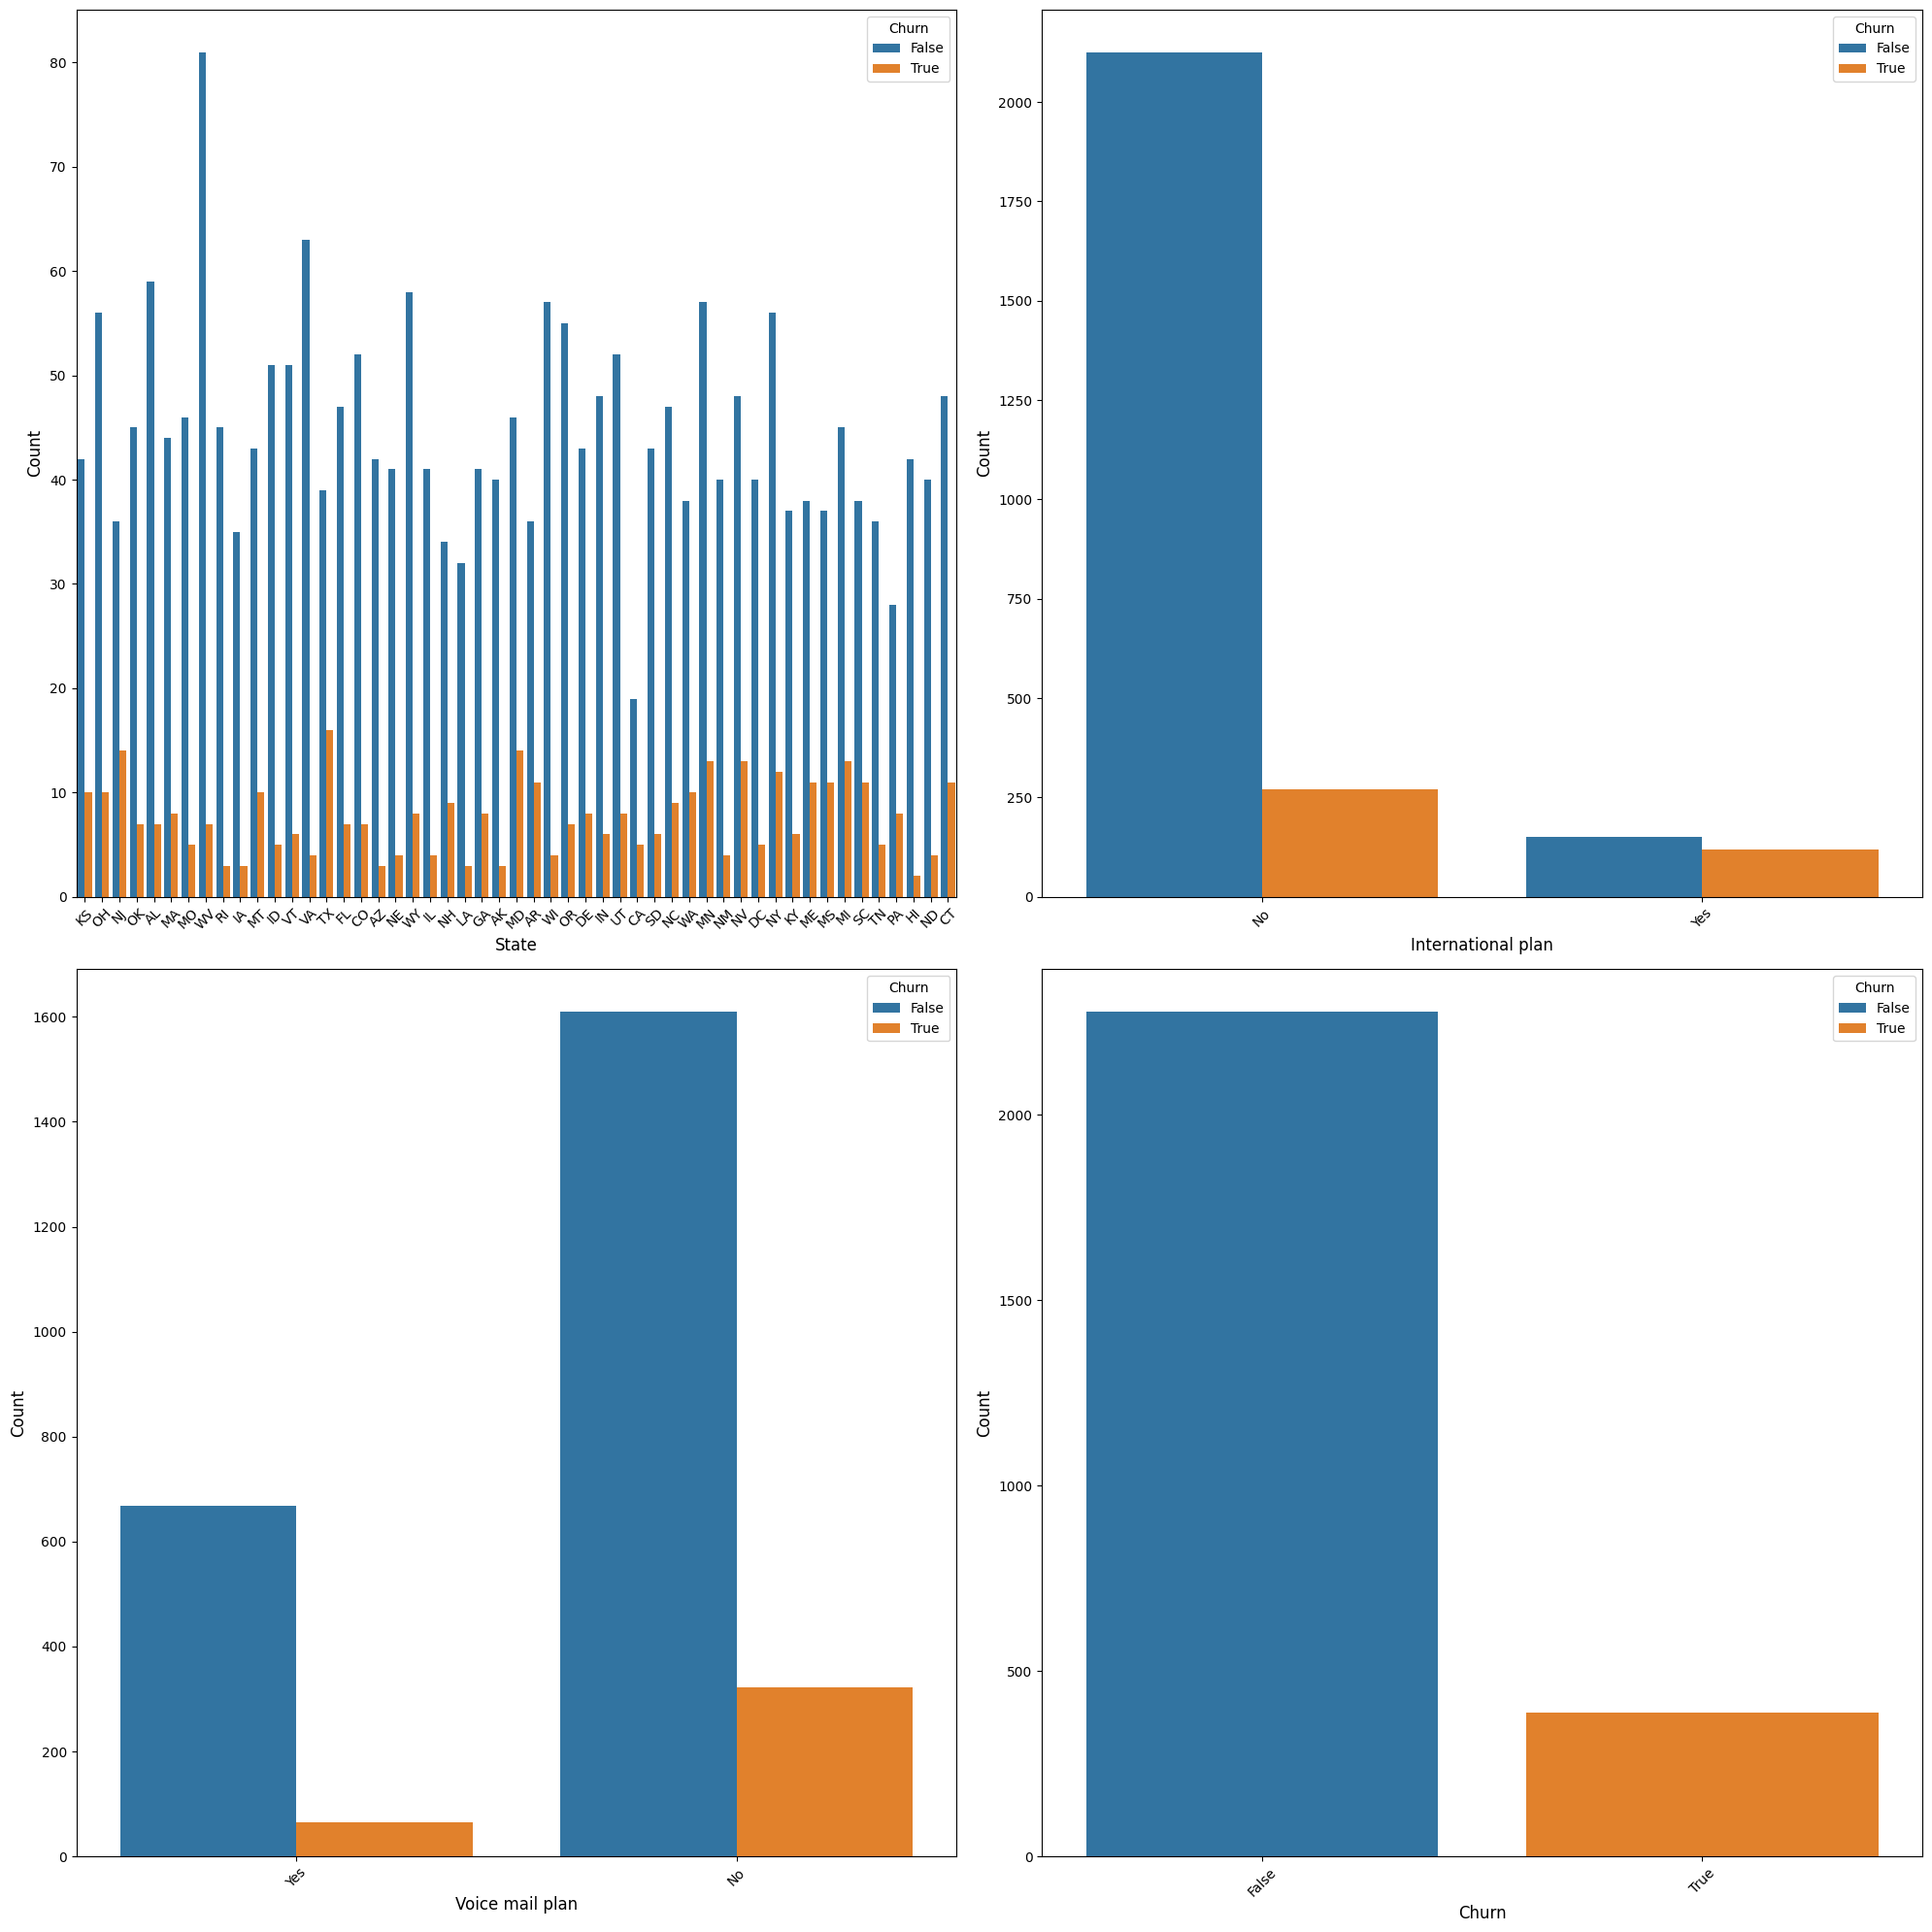

In [25]:
plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1

for column in cat_data:
    if plotnumber <= 16:
        ax = plt.subplot(2, 2, plotnumber)
        sns.countplot(x=data[column], hue=data['Churn'])
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
    plotnumber += 1

plt.tight_layout()
plt.savefig("chart.png", dpi=300, bbox_inches='tight')
plt.show()


In [27]:
# Select numerical columns
num_data = data.select_dtypes(include=['int64', 'float64']).columns

# Separate discrete and continuous
discrete_cols = [col for col in num_data if data[col].nunique() < 20]
continuous_cols = [col for col in num_data if data[col].nunique() >= 20]

print("Discrete Columns:", discrete_cols)
print("Continuous Columns:", continuous_cols)


Discrete Columns: ['Area code', 'Customer service calls']
Continuous Columns: ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge']


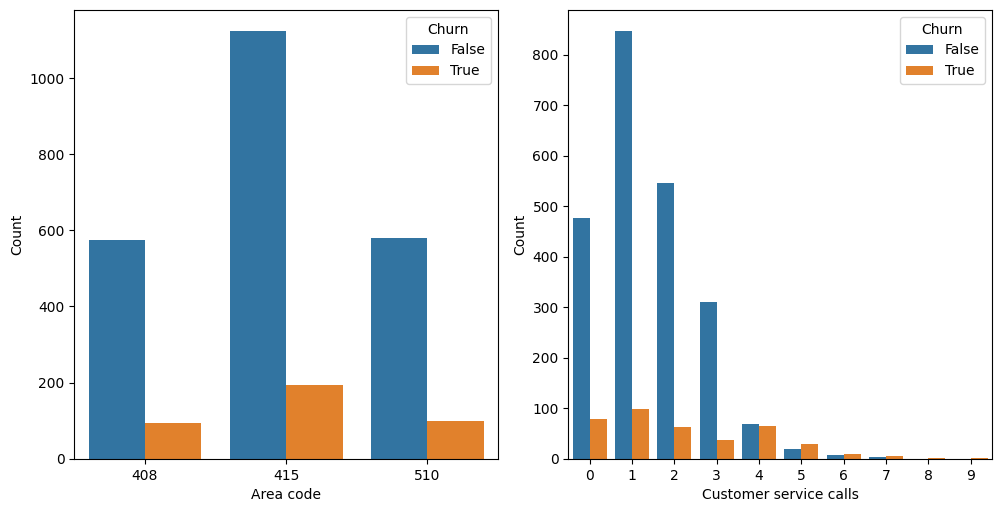

In [29]:
plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1

for column in discrete_cols:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.countplot(x=data[column], hue=data['Churn'])
        plt.xlabel(column)
        plt.ylabel('Count')
    plotnumber += 1

plt.tight_layout()
plt.savefig("churn.png", dpi=300, bbox_inches='tight')
plt.show()


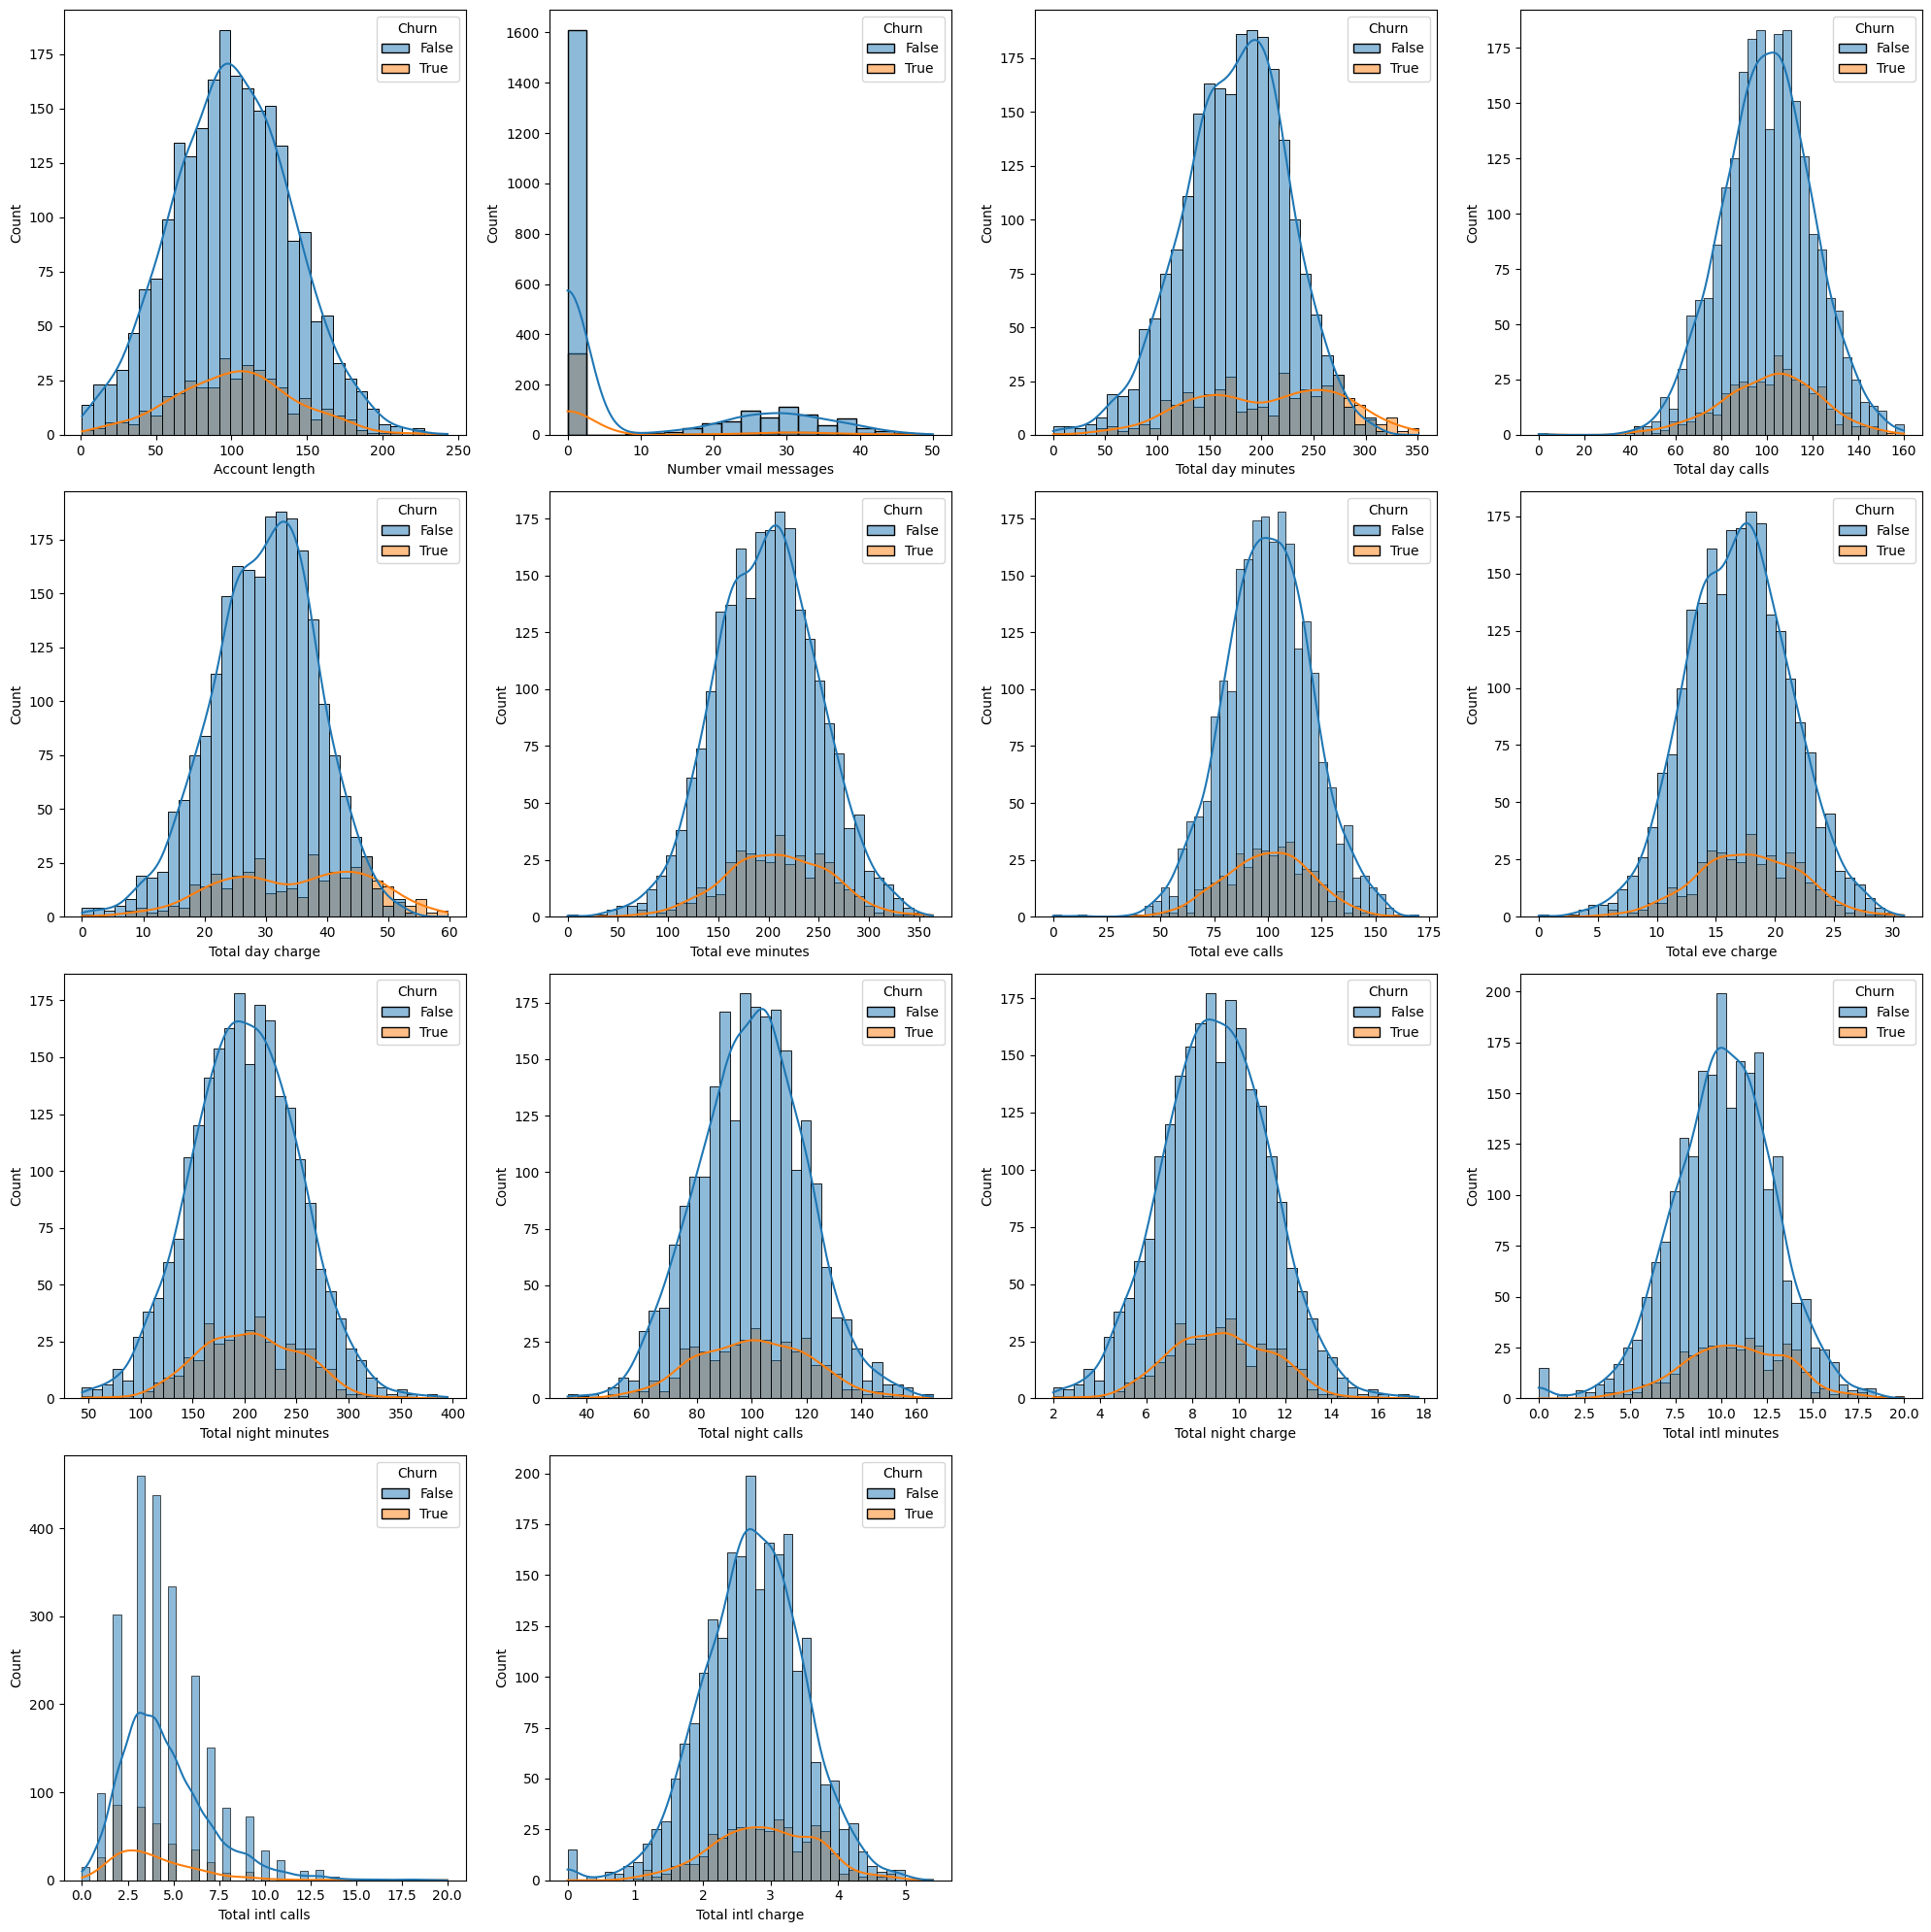

In [38]:
plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1

for column in continuous_cols:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(data=data, x=column, hue='Churn', kde=True)
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.savefig("subplot.png", dpi=300, bbox_inches='tight')
plt.show()


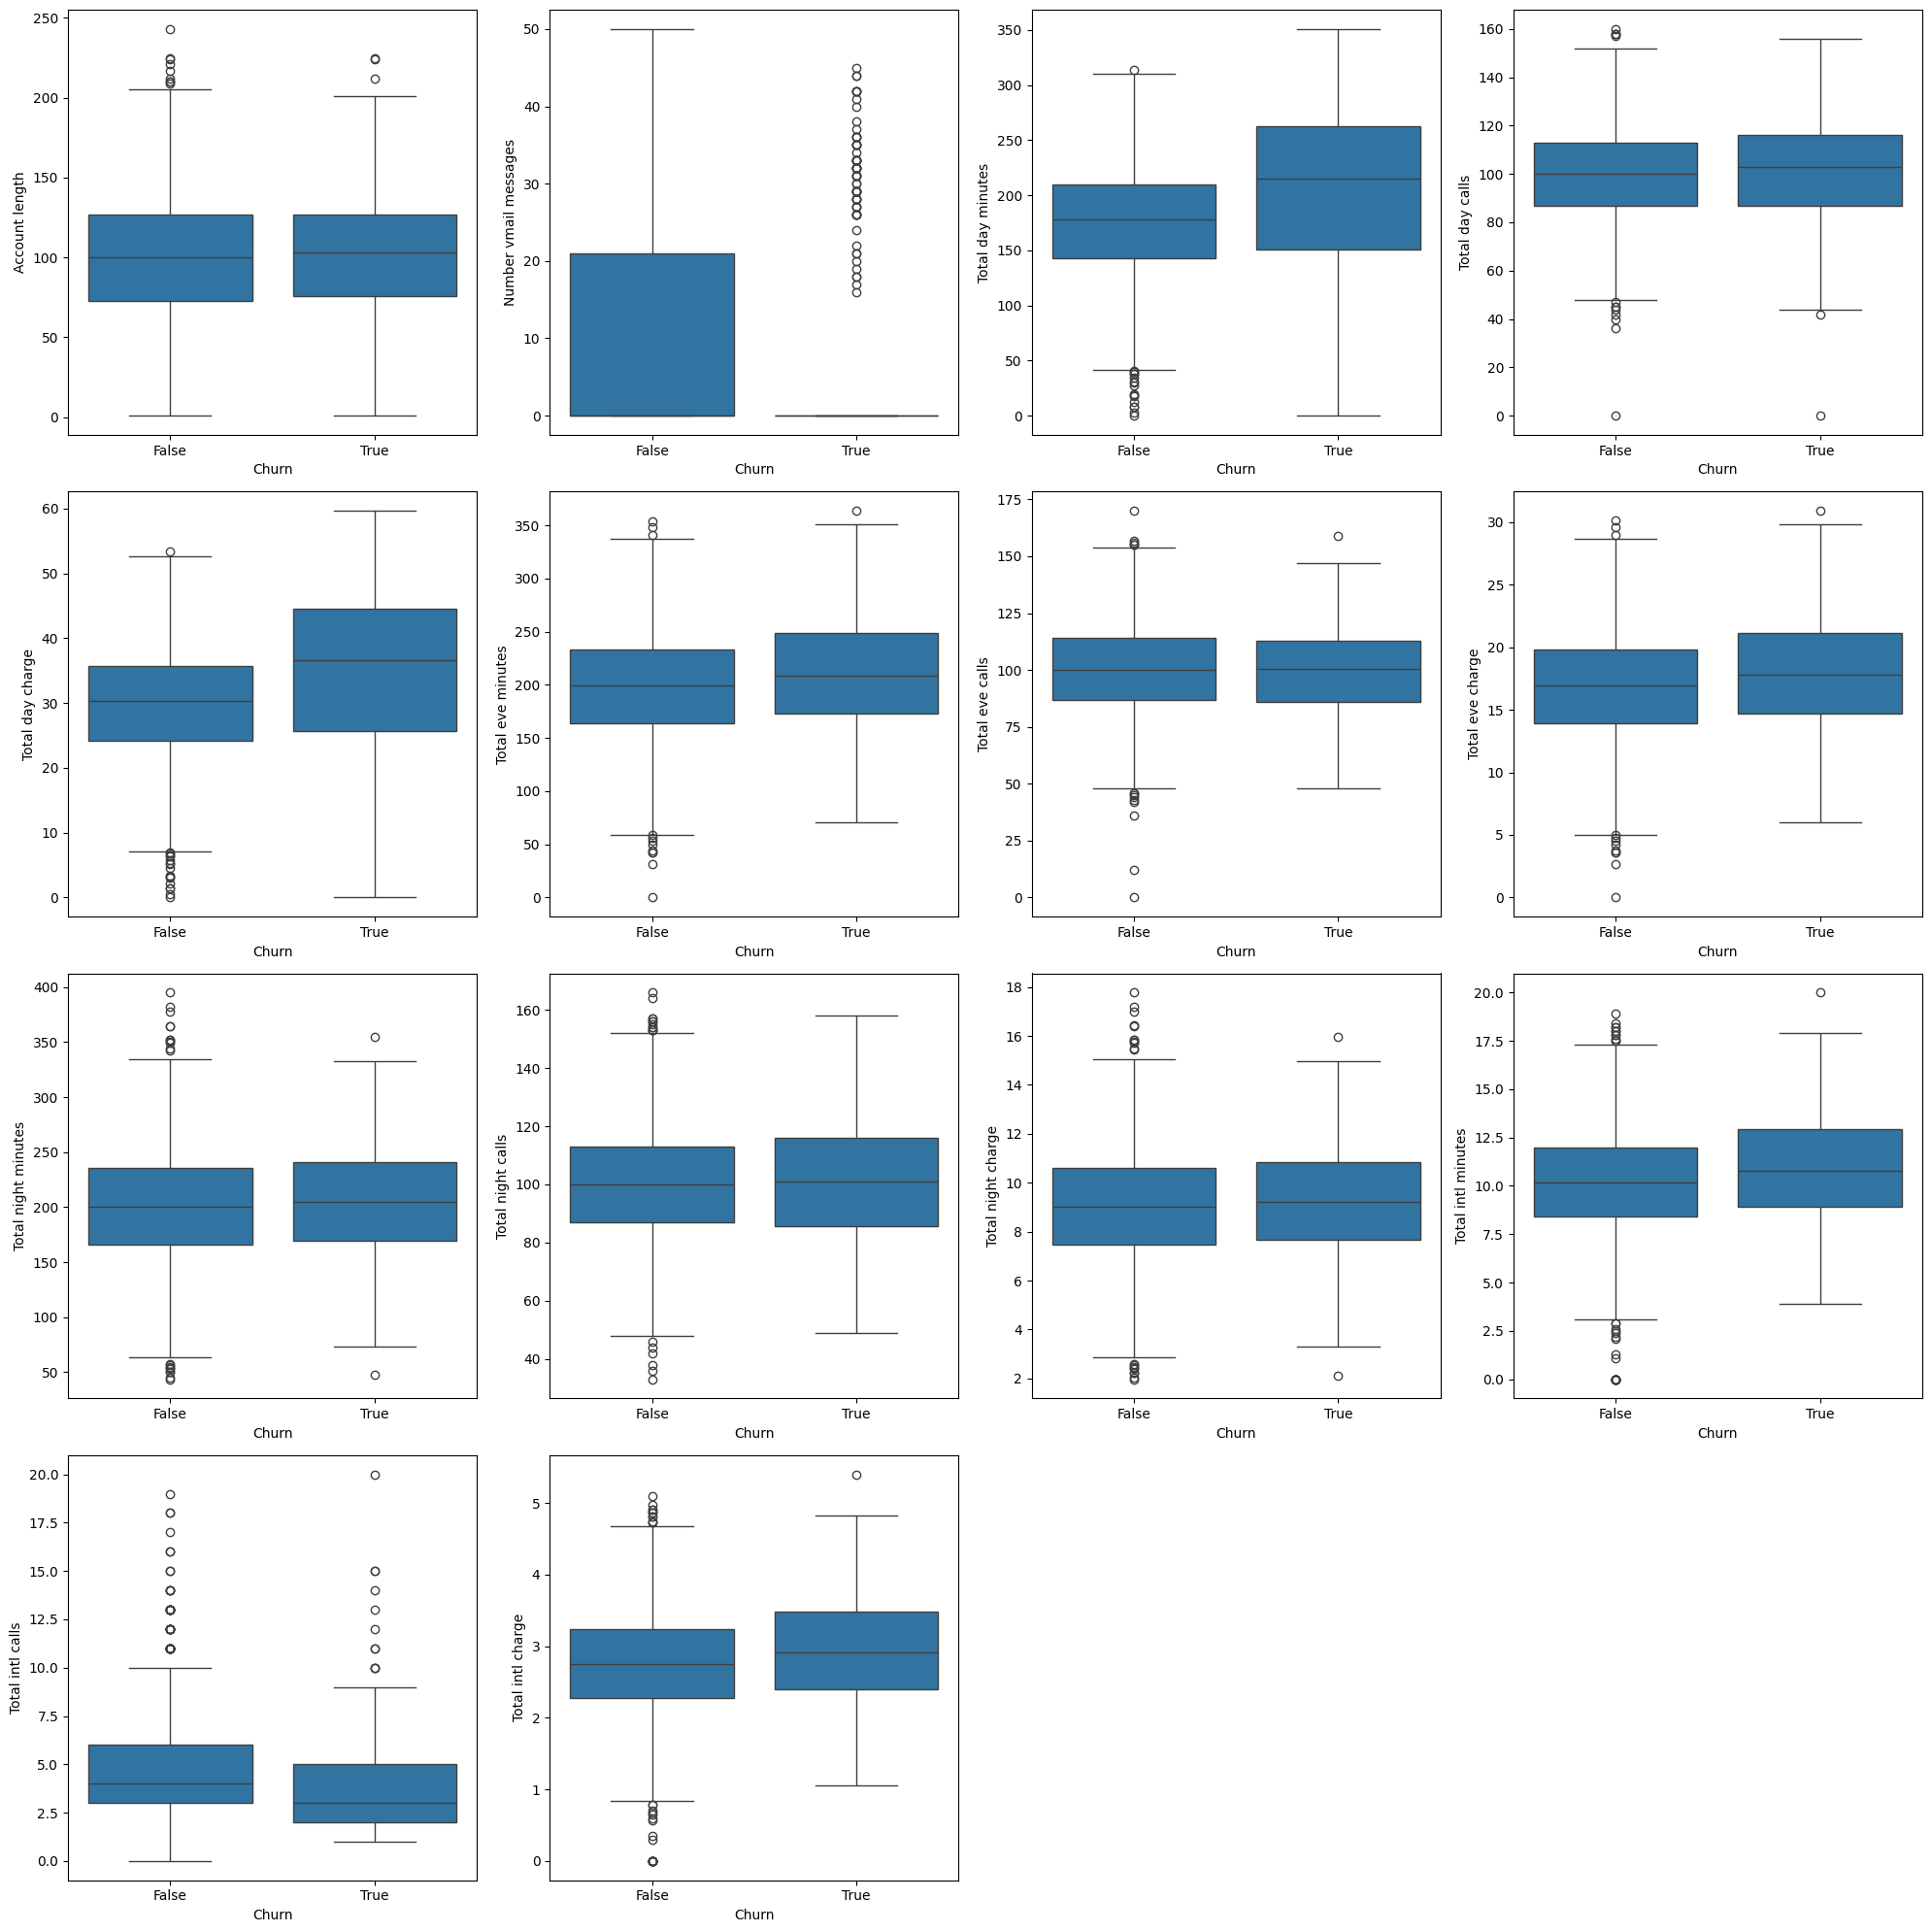

In [39]:
plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1

for column in continuous_cols:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(x=data['Churn'], y=data[column])
        plt.xlabel('Churn')
        plt.ylabel(column)
    plotnumber += 1

plt.tight_layout()
plt.savefig("Outlier.png", dpi=300, bbox_inches='tight')
plt.show()

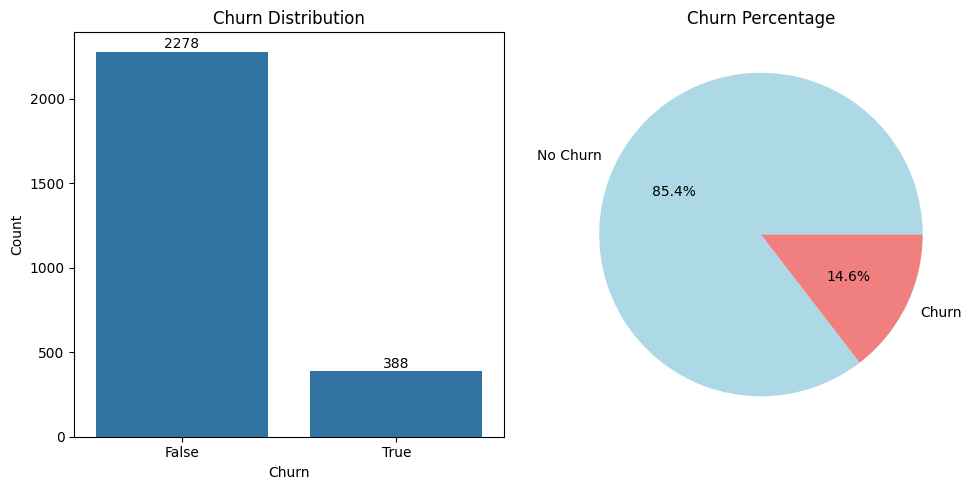

Total samples: 2666
Churned customers: 388 (14.55%)
Non-churned customers: 2278 (85.45%)


In [40]:
# Step 1: Analyze target variable distribution
plt.figure(figsize=(10, 5))

# Subplot 1: Count plot
plt.subplot(1, 2, 1)
churn_counts = data['Churn'].value_counts()
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
for i, v in enumerate(churn_counts.values):
    plt.text(i, v + 20, str(v), ha='center')

# Subplot 2: Percentage plot
plt.subplot(1, 2, 2)
churn_percentage = data['Churn'].value_counts(normalize=True) * 100
plt.pie(churn_percentage.values, labels=['No Churn', 'Churn'], 
        autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Churn Percentage')

plt.tight_layout()
plt.savefig("Features.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"Total samples: {len(data)}")
print(f"Churned customers: {churn_counts[True]} ({churn_percentage[True]:.2f}%)")
print(f"Non-churned customers: {churn_counts[False]} ({churn_percentage[False]:.2f}%)")

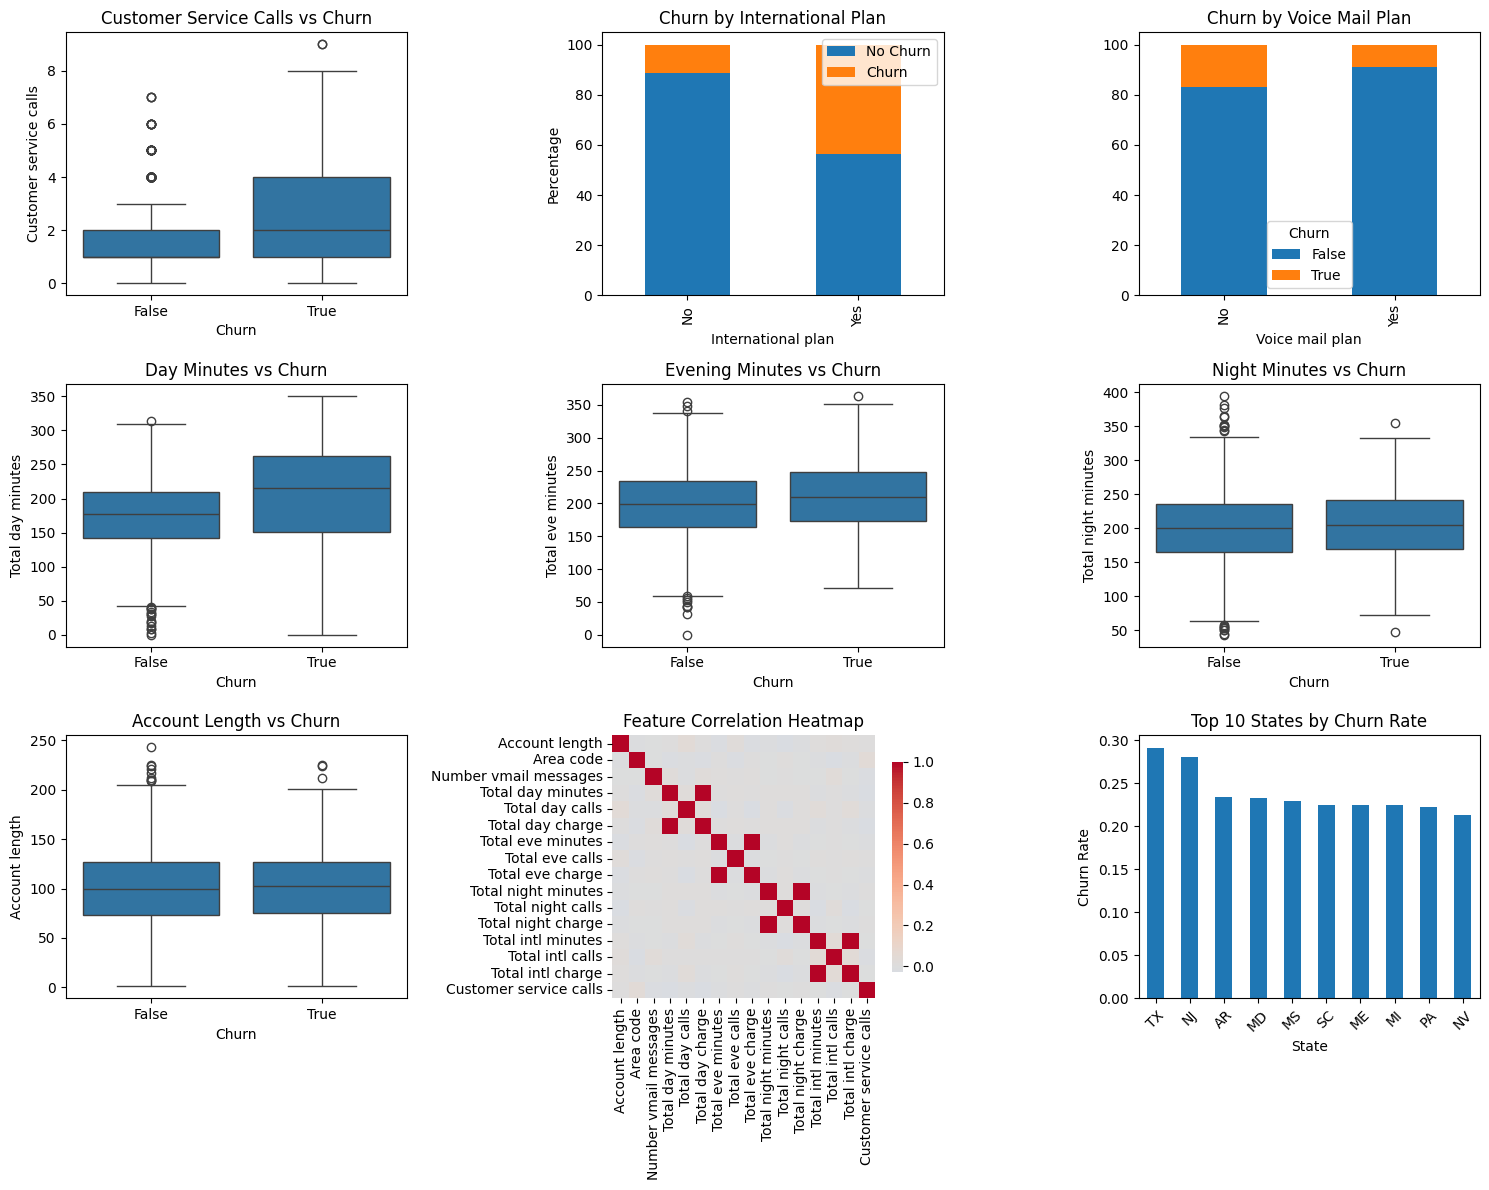

Correlation Analysis:

Highly Correlated Features (|correlation| > 0.8):
  Total day charge & Total day minutes: 1.000
  Total eve charge & Total eve minutes: 1.000
  Total night charge & Total night minutes: 1.000
  Total intl charge & Total intl minutes: 1.000

Business Insight: These features might be redundant and could be removed
to reduce multicollinearity in the model.

Correlation with Target (Churn):
------------------------------

Top 5 features positively correlated with Churn:
  Customer service calls: 0.203
  Total day charge: 0.196
  Total day minutes: 0.196
  Total intl charge: 0.086
  Total intl minutes: 0.086

Top 5 features negatively correlated with Churn:
  Total night calls: 0.012
  Area code: 0.001
  Total eve calls: -0.002
  Total intl calls: -0.070
  Number vmail messages: -0.086


In [41]:
# Step 2: Create visualizations for key features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# 2.1 Customer Service Calls vs Churn
sns.boxplot(x='Churn', y='Customer service calls', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Customer Service Calls vs Churn')

# 2.2 International Plan vs Churn
churn_by_international = pd.crosstab(data['International plan'], data['Churn'], normalize='index') * 100
churn_by_international.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Churn by International Plan')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(['No Churn', 'Churn'])

# 2.3 Voice Mail Plan vs Churn
churn_by_voicemail = pd.crosstab(data['Voice mail plan'], data['Churn'], normalize='index') * 100
churn_by_voicemail.plot(kind='bar', stacked=True, ax=axes[0, 2])
axes[0, 2].set_title('Churn by Voice Mail Plan')

# 2.4 Day Minutes vs Churn
sns.boxplot(x='Churn', y='Total day minutes', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Day Minutes vs Churn')

# 2.5 Evening Minutes vs Churn
sns.boxplot(x='Churn', y='Total eve minutes', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Evening Minutes vs Churn')

# 2.6 Night Minutes vs Churn
sns.boxplot(x='Churn', y='Total night minutes', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Night Minutes vs Churn')

# 2.7 Account Length vs Churn
sns.boxplot(x='Churn', y='Account length', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Account Length vs Churn')

# 2.8 Correlation heatmap (numerical features)
# Get only numerical columns from the actual data
numerical_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numerical_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, ax=axes[2, 1], cbar_kws={'shrink': 0.8})
axes[2, 1].set_title('Feature Correlation Heatmap')

# 2.9 State-wise churn rate (top 10 states)
state_churn = data.groupby('State')['Churn'].mean().sort_values(ascending=False).head(10)
state_churn.plot(kind='bar', ax=axes[2, 2])
axes[2, 2].set_title('Top 10 States by Churn Rate')
axes[2, 2].set_ylabel('Churn Rate')
axes[2, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Additional insights from the correlation matrix
print("Correlation Analysis:")
print("=" * 50)

# Find highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, corr_value))

if high_corr_pairs:
    print("\nHighly Correlated Features (|correlation| > 0.8):")
    for col1, col2, corr_value in high_corr_pairs:
        print(f"  {col1} & {col2}: {corr_value:.3f}")
        
    print("\nBusiness Insight: These features might be redundant and could be removed")
    print("to reduce multicollinearity in the model.")
else:
    print("\nNo extremely high correlations found (all |correlation| < 0.8)")
    print("This suggests good feature diversity.")

# Check correlation with target
print("\n" + "=" * 50)
print("Correlation with Target (Churn):")
print("-" * 30)

# Convert Churn to numeric for correlation
data_numeric = data.copy()
data_numeric['Churn'] = data_numeric['Churn'].astype(int)

# Calculate correlation with target for numerical features
corr_with_target = data_numeric[numerical_cols.tolist() + ['Churn']].corr()['Churn'].sort_values(ascending=False)

# Remove Churn itself from the list
corr_with_target = corr_with_target[corr_with_target.index != 'Churn']

print("\nTop 5 features positively correlated with Churn:")
for feature, corr in corr_with_target.head(5).items():
    print(f"  {feature}: {corr:.3f}")

print("\nTop 5 features negatively correlated with Churn:")
for feature, corr in corr_with_target.tail(5).items():
    print(f"  {feature}: {corr:.3f}")

Highly correlated features (correlation > 0.8):
['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Total charge', 'Day usage ratio', 'Avg charge per minute']


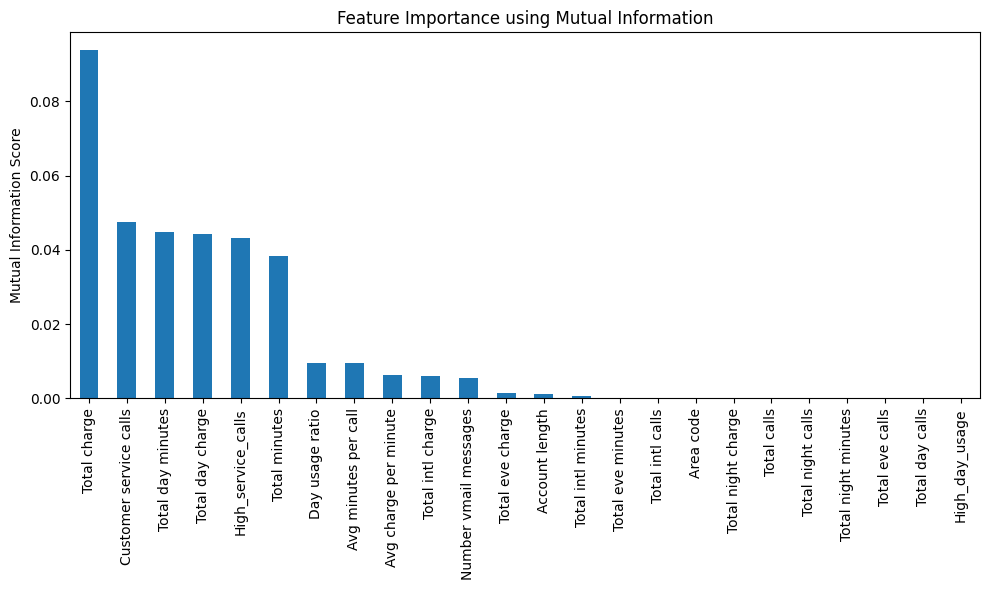

In [42]:
# Step 3: Feature Engineering
from sklearn.feature_selection import mutual_info_classif

# 3.1 Create new features
data_eng = data.copy()

# Create total usage features
data_eng['Total minutes'] = data_eng['Total day minutes'] + \
                           data_eng['Total eve minutes'] + \
                           data_eng['Total night minutes'] + \
                           data_eng['Total intl minutes']

data_eng['Total calls'] = data_eng['Total day calls'] + \
                         data_eng['Total eve calls'] + \
                         data_eng['Total night calls'] + \
                         data_eng['Total intl calls']

data_eng['Total charge'] = data_eng['Total day charge'] + \
                          data_eng['Total eve charge'] + \
                          data_eng['Total night charge'] + \
                          data_eng['Total intl charge']

# Create usage patterns
data_eng['Day usage ratio'] = data_eng['Total day minutes'] / data_eng['Total minutes']
data_eng['Avg minutes per call'] = data_eng['Total minutes'] / data_eng['Total calls']
data_eng['Avg charge per minute'] = data_eng['Total charge'] / data_eng['Total minutes']

# Create binary flags for high usage
data_eng['High_service_calls'] = (data_eng['Customer service calls'] > 3).astype(int)
data_eng['High_day_usage'] = (data_eng['Total day minutes'] > data_eng['Total day minutes'].median()).astype(int)

# 3.2 Check for multicollinearity
# Identify highly correlated features
corr_matrix = data_eng.select_dtypes(include=[np.number]).corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns 
                      if any(upper_triangle[column] > 0.8)]

print("Highly correlated features (correlation > 0.8):")
print(high_corr_features)

# 3.3 Feature importance using mutual information
X_temp = data_eng.select_dtypes(include=[np.number]).drop('Churn', axis=1, errors='ignore')
y_temp = data_eng['Churn'].astype(int)

# Handle NaN values
X_temp = X_temp.fillna(X_temp.mean())

mi_scores = mutual_info_classif(X_temp, y_temp, random_state=42)
mi_scores = pd.Series(mi_scores, index=X_temp.columns)
mi_scores = mi_scores.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mi_scores.plot(kind='bar')
plt.title('Feature Importance using Mutual Information')
plt.ylabel('Mutual Information Score')
plt.tight_layout()
plt.show()

In [43]:
# Step 4: Create preprocessing pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# 4.1 Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn'].astype(int)  # Convert boolean to int (0/1)

# 4.2 Split data before any preprocessing to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Training churn rate: {y_train.mean():.2%}")
print(f"Testing churn rate: {y_test.mean():.2%}")

# 4.3 Identify column types
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'Area code' from numerical since it's categorical
if 'Area code' in numerical_cols:
    numerical_cols.remove('Area code')
    categorical_cols.append('Area code')

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# 4.4 Create preprocessing pipelines
from sklearn.compose import ColumnTransformer

# Numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# 4.5 Fit and transform training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding
categorical_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
categorical_features = categorical_encoder.get_feature_names_out(categorical_cols)
all_feature_names = list(numerical_cols) + list(categorical_features)

print(f"Original features: {X_train.shape[1]}")
print(f"Processed features: {X_train_processed.shape[1]}")

Training set size: (2132, 19)
Testing set size: (534, 19)
Training churn rate: 14.54%
Testing churn rate: 14.61%
Categorical columns: ['State', 'International plan', 'Voice mail plan', 'Area code']
Numerical columns: ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
Original features: 19
Processed features: 73


In [44]:
# Step 5: Handle class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# 5.1 Analyze imbalance
print("Class distribution in training set:")
print(y_train.value_counts())
print(f"\nChurn rate: {y_train.mean():.2%}")

# 5.2 Choose strategy based on imbalance severity
if y_train.mean() < 0.1:  # Severe imbalance (<10% minority)
    print("Severe imbalance detected - using combination of SMOTE and undersampling")
    
    # Define sampling strategy
    over = SMOTE(sampling_strategy=0.5, random_state=42)
    under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
    
    # Apply to training data
    X_train_balanced, y_train_balanced = over.fit_resample(X_train_processed, y_train)
    X_train_balanced, y_train_balanced = under.fit_resample(X_train_balanced, y_train_balanced)
    
elif y_train.mean() < 0.3:  # Moderate imbalance
    print("Moderate imbalance detected - using SMOTE")
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)
    
else:  # Mild imbalance
    print("Mild imbalance - using class weights in models")
    X_train_balanced, y_train_balanced = X_train_processed, y_train

print(f"\nBefore balancing - Class 0: {(y_train == 0).sum()}, Class 1: {(y_train == 1).sum()}")
print(f"After balancing - Class 0: {(y_train_balanced == 0).sum()}, Class 1: {(y_train_balanced == 1).sum()}")

Class distribution in training set:
Churn
0    1822
1     310
Name: count, dtype: int64

Churn rate: 14.54%
Moderate imbalance detected - using SMOTE

Before balancing - Class 0: 1822, Class 1: 310
After balancing - Class 0: 1822, Class 1: 1822


BASELINE MODEL PERFORMANCE
Accuracy: 0.7509

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.92      0.77      0.84       456
       Churn       0.32      0.63      0.42        78

    accuracy                           0.75       534
   macro avg       0.62      0.70      0.63       534
weighted avg       0.84      0.75      0.78       534



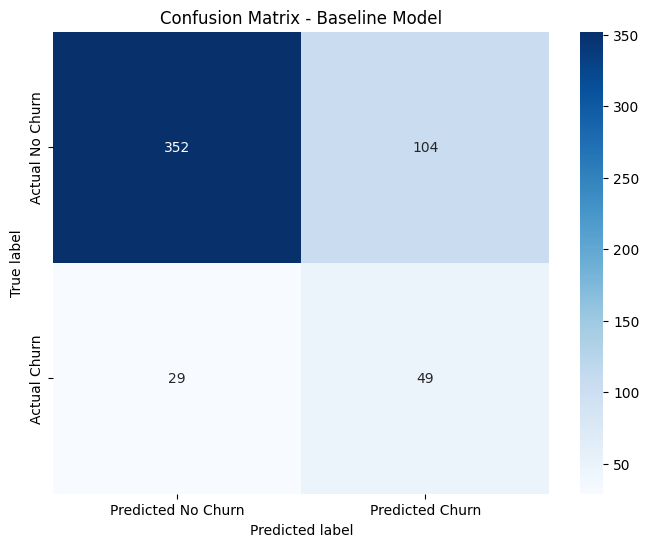

ROC-AUC Score: 0.7455


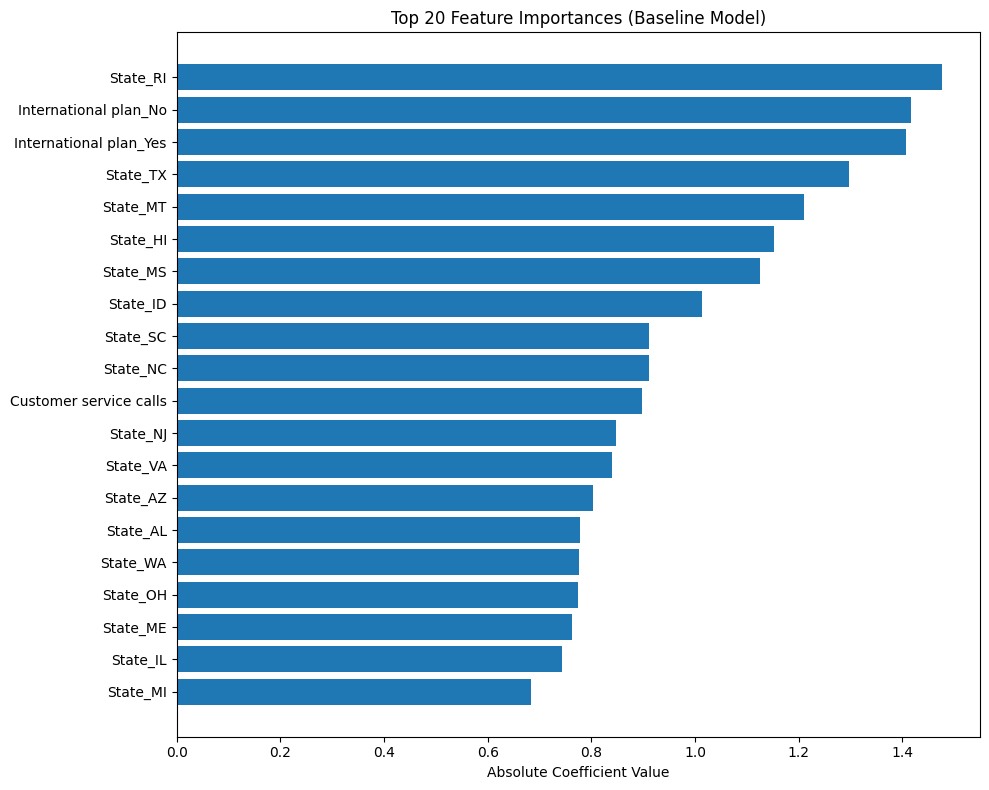

In [45]:
# Step 6: Build baseline model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# 6.1 Train baseline model (Logistic Regression)
baseline_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
baseline_model.fit(X_train_processed, y_train)

# 6.2 Make predictions
y_pred_baseline = baseline_model.predict(X_test_processed)
y_pred_proba_baseline = baseline_model.predict_proba(X_test_processed)[:, 1]

# 6.3 Evaluate baseline model
print("="*60)
print("BASELINE MODEL PERFORMANCE")
print("="*60)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=['No Churn', 'Churn']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix - Baseline Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba_baseline)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 6.4 Feature importance from baseline modelb
if hasattr(baseline_model, 'coef_'):
    feature_importance = pd.DataFrame({
        'feature': all_feature_names,
        'importance': abs(baseline_model.coef_[0])
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance['feature'].head(20), 
             feature_importance['importance'].head(20))
    plt.xlabel('Absolute Coefficient Value')
    plt.title('Top 20 Feature Importances (Baseline Model)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [46]:
!pip install xgboost lightgbm -q

In [47]:
# Step 7: Try multiple advanced models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import lightgbm as lgb

# 7.1 Define models to try
models = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),
    'KNN': KNeighborsClassifier()
}

# 7.2 Evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Predict
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, 
                                cv=5, scoring='roc_auc')
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}" if roc_auc else "  ROC-AUC: N/A")
    print(f"  CV ROC-AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

# 7.3 Compare model performances
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('roc_auc', ascending=False)

print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)
print(results_df[['accuracy', 'roc_auc', 'cv_mean', 'cv_std']])


Training Random Forest...
  Accuracy: 0.9213
  ROC-AUC: 0.8678
  CV ROC-AUC: 0.9950 (+/- 0.0140)

Training Gradient Boosting...
  Accuracy: 0.9195
  ROC-AUC: 0.8526
  CV ROC-AUC: 0.9830 (+/- 0.0396)

Training XGBoost...
  Accuracy: 0.9476
  ROC-AUC: 0.8697
  CV ROC-AUC: 0.9944 (+/- 0.0183)

Training LightGBM...
  Accuracy: 0.9532
  ROC-AUC: 0.8556
  CV ROC-AUC: 0.9951 (+/- 0.0142)

Training SVM...
  Accuracy: 0.8820
  ROC-AUC: 0.8411
  CV ROC-AUC: 0.9787 (+/- 0.0111)

Training KNN...
  Accuracy: 0.7584
  ROC-AUC: 0.7633
  CV ROC-AUC: 0.9708 (+/- 0.0122)

MODEL COMPARISON
                   accuracy   roc_auc   cv_mean    cv_std
XGBoost            0.947566  0.869686  0.994434  0.009148
Random Forest      0.921348  0.867831  0.995036  0.007008
LightGBM           0.953184  0.855629  0.995106  0.007105
Gradient Boosting  0.919476   0.85262  0.983049  0.019818
SVM                0.882022  0.841093  0.978673  0.005538
KNN                0.758427  0.763313  0.970781  0.006078


In [48]:
# Step 8: Hyperparameter tuning for best model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 8.1 Select best model based on ROC-AUC
best_model_name = results_df.index[0]
best_model = results[best_model_name]['model']
print(f"\nBest model: {best_model_name}")

# 8.2 Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 15],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100],
        'subsample': [0.8, 1.0]
    }
}

# 8.3 Perform hyperparameter tuning if parameters are defined
if best_model_name in param_grids:
    print(f"\nPerforming hyperparameter tuning for {best_model_name}...")
    
    # Use RandomizedSearchCV for faster search
    search = RandomizedSearchCV(
        best_model,
        param_grids[best_model_name],
        n_iter=20,  # Number of parameter settings sampled
        scoring='roc_auc',
        cv=3,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    
    search.fit(X_train_balanced, y_train_balanced)
    
    print(f"Best parameters: {search.best_params_}")
    print(f"Best CV score: {search.best_score_:.4f}")
    
    # Update best model with tuned parameters
    best_model = search.best_estimator_
    
    # Evaluate tuned model
    y_pred_tuned = best_model.predict(X_test_processed)
    y_pred_proba_tuned = best_model.predict_proba(X_test_processed)[:, 1]
    
    print(f"\nTuned Model Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_tuned):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_tuned, target_names=['No Churn', 'Churn']))


Best model: XGBoost

Performing hyperparameter tuning for XGBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best CV score: 0.9948

Tuned Model Performance:
Accuracy: 0.9476
ROC-AUC: 0.8724

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.95      0.99      0.97       456
       Churn       0.90      0.72      0.80        78

    accuracy                           0.95       534
   macro avg       0.93      0.85      0.88       534
weighted avg       0.95      0.95      0.95       534



In [49]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.



MODEL INTERPRETATION WITH SHAP


  0%|          | 0/50 [00:00<?, ?it/s]


Top 10 Most Important Features:
                   feature  importance
67  International plan_Yes    0.130779
60                State_VA    0.059795
40                State_MS    0.045665
1    Number vmail messages    0.043369
58                State_TX    0.041329
41                State_MT    0.041045
66   International plan_No    0.036730
35                State_MD    0.036542
69     Voice mail plan_Yes    0.033498
14  Customer service calls    0.031172


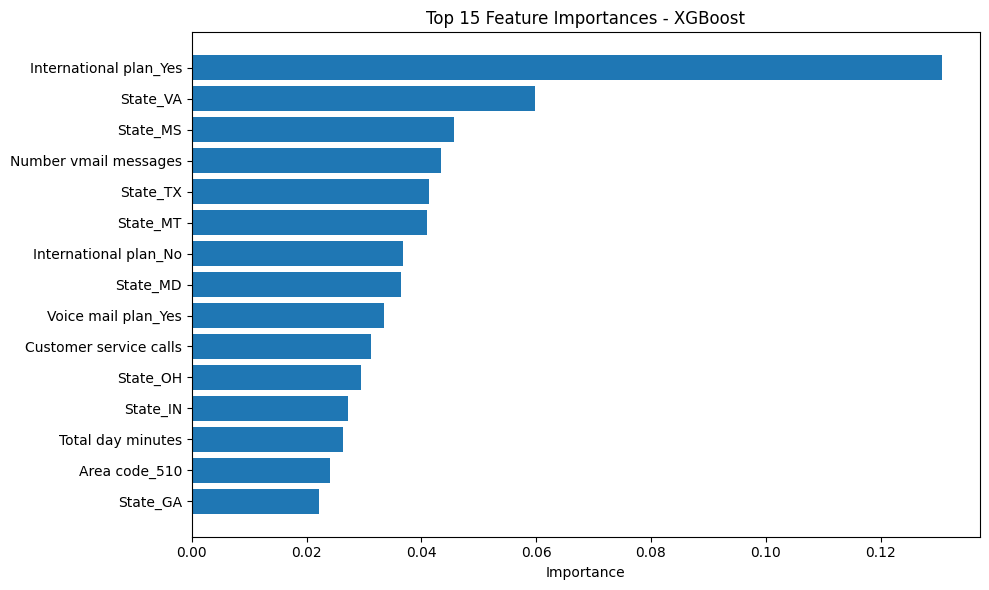

In [50]:
# Step 9: Model interpretation and business insights
import shap

# 9.1 SHAP analysis for model interpretability
print("\n" + "="*60)
print("MODEL INTERPRETATION WITH SHAP")
print("="*60)

# Initialize SHAP explainer based on model type
if 'tree' in str(type(best_model)).lower():
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test_processed)
    
    # Summary plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_test_processed, 
                     feature_names=all_feature_names, 
                     max_display=20, show=False)
    plt.title(f'SHAP Summary Plot - {best_model_name}')
    plt.tight_layout()
    plt.show()
    
    # Force plot for a specific prediction
    sample_idx = 0
    plt.figure()
    shap.force_plot(explainer.expected_value, shap_values[sample_idx, :], 
                   X_test_processed[sample_idx, :], 
                   feature_names=all_feature_names, matplotlib=True, show=False)
    plt.title(f'SHAP Force Plot for Sample {sample_idx}')
    plt.tight_layout()
    plt.show()
    
else:
    # For non-tree models, use KernelExplainer
    explainer = shap.KernelExplainer(best_model.predict_proba, X_train_processed[:100])
    shap_values = explainer.shap_values(X_test_processed[:50])

# 9.2 Business insights from feature importance
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': all_feature_names,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'].head(15), 
             feature_importance['importance'].head(15))
    plt.xlabel('Importance')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [51]:
# Step 1: Save Model and Artifacts for Flask Deployment
import pandas as pd
import numpy as np
import joblib
import json
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Load your data
data = pd.read_csv("churn-bigml-80.csv")

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn'].astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify column types
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'Area code' from numerical since it's categorical
if 'Area code' in numerical_cols:
    numerical_cols.remove('Area code')
    categorical_cols.append('Area code')

# Create preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Fit preprocessor
X_train_processed = preprocessor.fit_transform(X_train)

# Get feature names after one-hot encoding
categorical_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
categorical_features = categorical_encoder.get_feature_names_out(categorical_cols)
all_feature_names = list(numerical_cols) + list(categorical_features)

# Train a simple Random Forest model for deployment
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    max_depth=10,
    min_samples_split=5
)
model.fit(X_train_processed, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': all_feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Get top 10 features for display
top_10_features = feature_importance.head(10).to_dict('records')

# Create directory for artifacts
import os
os.makedirs('flask_app/model', exist_ok=True)
os.makedirs('flask_app/templates', exist_ok=True)
os.makedirs('flask_app/static/css', exist_ok=True)

# Save artifacts
joblib.dump(preprocessor, 'flask_app/model/preprocessor.pkl')
joblib.dump(model, 'flask_app/model/model.pkl')

# Save metadata
metadata = {
    'model_name': 'Random Forest Classifier',
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'model_version': '1.0',
    'features_used': list(X.columns),
    'top_features': top_10_features,
    'data_info': {
        'training_samples': len(X_train),
        'testing_samples': len(X_test),
        'original_features': X.shape[1],
        'processed_features': X_train_processed.shape[1],
        'churn_rate_training': float(y_train.mean()),
        'churn_rate_testing': float(y_test.mean())
    }
}

with open('flask_app/model/metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)

# Save feature names
with open('flask_app/model/feature_names.json', 'w') as f:
    json.dump(list(all_feature_names), f)

print("✅ Model artifacts saved successfully!")
print(f"📁 Location: flask_app/") # mention the path where it should be saved and change as per your requirement 
print(f"  - Model: flask_app/model/model.pkl")
print(f"  - Preprocessor: flask_app/model/preprocessor.pkl")
print(f"  - Metadata: flask_app/model/metadata.json")
print(f"  - Feature names: flask_app/model/feature_names.json")
print(f"\n📊 Top 10 Important Features:")
for i, feat in enumerate(top_10_features, 1):
    print(f"  {i}. {feat['feature']}: {feat['importance']:.4f}")

✅ Model artifacts saved successfully!
📁 Location: flask_app/
  - Model: flask_app/model/model.pkl
  - Preprocessor: flask_app/model/preprocessor.pkl
  - Metadata: flask_app/model/metadata.json
  - Feature names: flask_app/model/feature_names.json

📊 Top 10 Important Features:
  1. Total day charge: 0.1564
  2. Customer service calls: 0.1327
  3. Total day minutes: 0.1044
  4. International plan_Yes: 0.0747
  5. International plan_No: 0.0529
  6. Total eve charge: 0.0445
  7. Total eve minutes: 0.0426
  8. Total intl charge: 0.0386
  9. Total night charge: 0.0350
  10. Total intl minutes: 0.0345
